In [37]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df_all = pd.read_csv('//Users/sophie/Desktop/UWash/Data515/analyst_ratings_processed.csv')
df = df_all.iloc[:, 1:]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A
...,...,...,...
1400464,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX


In [53]:
# map stock to company name
nasdaq = pd.read_csv("//Users/sophie/Desktop/UWash/Data515/nasdaq-listed-symbols_csv.csv")
nasdaq = nasdaq.rename(columns={'Symbol': 'stock'})
print(nasdaq.head())
nyse = pd.read_csv('//Users/sophie/Desktop/UWash/Data515/nyse-listed_csv.csv')
# nyse = nyse.rename(columns={'ACT Symbol': 'stock'})
# nyse
other = pd.read_csv('//Users/sophie/Desktop/UWash/Data515/other-listed_csv.csv')
other

  stock                                       Company Name
0  AAIT  iShares MSCI All Country Asia Information Tech...
1   AAL                      American Airlines Group, Inc.
2  AAME                      Atlantic American Corporation
3  AAOI                      Applied Optoelectronics, Inc.
4  AAON                                         AAON, Inc.


,ACT Symbol,Company Name,Security Name,Exchange,CQS Symbol,ETF,Round Lot Size,Test Issue,NASDAQ Symbol
0,A,"Agilent Technologies, Inc. Common Stock","Agilent Technologies, Inc. Common Stock",N,A,N,100.0,N,A
1,AA,Alcoa Inc. Common Stock,Alcoa Inc. Common Stock,N,AA,N,100.0,N,AA
2,AA$,Alcoa Inc. $3.75 Preferred Stock,Alcoa Inc. $3.75 Preferred Stock,A,AAp,N,100.0,N,AA-
3,AA$B,Alcoa Inc. Depository Shares Representing 1/10...,Alcoa Inc. Depository Shares Representing 1/10...,N,AApB,N,100.0,N,AA-B
4,AAC,"AAC Holdings, Inc. Common Stock","AAC Holdings, Inc. Common Stock",N,AAC,N,100.0,N,AAC
...,...,...,...,...,...,...,...,...,...
5194,ZROZ,PIMCO 25 Year Zero Coupon U.S. Treasury Index...,PIMCO 25 Year Zero Coupon U.S. Treasury Index...,P,ZROZ,Y,100.0,N,ZROZ
5195,ZSL,ProShares UltraShort Silver,ProShares UltraShort Silver,P,ZSL,Y,100.0,N,ZSL
5196,ZTR,"Zweig Total Return Fund, Inc. (The) Common Stock","Zweig Total Return Fund, Inc. (The) Common Stock",N,ZTR,N,100.0,N,ZTR
5197,ZTS,Zoetis Inc. Class A Common Stock,Zoetis Inc. Class A Common Stock,N,ZTS,N,100.0,N,ZTS


In [ ]:
# ok so this doesn't work
df_nas = pd.merge(df, nasdaq, on='stock', how='left')
nyse_oth = pd.merge(nyse, other, on=['ACT Symbol', 'Company Name'], how='left')
nyse_oth = nyse_oth.rename(columns={'NASDAQ Symbol': 'stock'})
df_merged = pd.merge(df_nas, nyse_oth, on=['stock', 'Company Name'], how='left')
df_nas

,title,date,stock,Company Name
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A,NaN
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A,NaN
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A,NaN
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A,NaN
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A,NaN
...,...,...,...,...
1400464,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX,NaN
1400465,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX,NaN
1400466,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX,NaN
1400467,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX,NaN


In [7]:
events = pd.read_csv("30_yr_financial_events.csv")
events.head()

,DATE,FINANCIAL EVENT,CAUSE
0,1997-07,Asian Financial Crisis,"Thailand abandons the baht""s USD peg; Contagio..."
1,1998-08,Russian Financial Crisis,Russia defaults on domestic debt and devalues ...
2,2000-03,Dot Com Bubble Burst,NASDAQ peaks at 5048 and begins its collapse
3,2007-06,Global Financial Crisis,Subprime mortgage market collapses credit mark...
4,2010-05,European Sovereign Debt Crisis,Greece Ireland and Portugal receives EU-IMF ba...


In [176]:
market = pd.read_csv("30_yr_market_data.csv")
market = market.set_index("Date")
market = market.sort_index()
print(market.index.inferred_type)
market.head()

string


,DAX Index,Dow Jones,FTSE 100,Hang Seng Index,Nasdaq,NYSE Composite,S&P500,CBOE Volitility,Amazon,Apple,...,Aluminum,Copper,Gold,Palladium,Platinum,Silver,T-Bill 13 Week,T-Note 5 Years,T-Note 10 Years,T-Bond 30 Years
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-02,2079.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-03,2068.92,3838.48,3065.7,7844.1,743.58,2651.15,459.11,14.25,NaN,0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,5.52,7.881,7.877,7.91
1995-01-04,2072.90,3857.65,3051.6,7887.0,745.84,2658.87,460.71,13.53,NaN,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,5.69,7.819,7.813,7.85
1995-01-05,2051.46,3850.92,3032.3,7918.4,745.66,2658.13,460.34,13.50,NaN,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,5.71,7.866,7.868,7.88
1995-01-06,2058.20,3867.41,3065.0,7683.3,749.69,2660.24,460.68,13.13,NaN,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,5.74,7.865,7.850,7.853


In [9]:
symbols = pd.read_csv("30_yr_symbols_data.csv")
symbols.head()

,SYMBOL,NAME,TYPE,FULL_NAME,UNIT,information
0,^GDAXI,DAX Index,Market Index,Deutsche Boerse DAX Index Germany,Index Points,NaN
1,^DJI,Dow Jones,Market Index,Dow Jones Industrial Average,Index Points,NaN
2,^FTSE,FTSE 100,Market Index,FTSE 100 Great Britain,Index Points,NaN
3,^HSI,Hang Seng Index,Market Index,Hang Seng Index Hong Kong,Index Points,NaN
4,^IXIC,Nasdaq,Market Index,Nasdaq Composite,Index Points,NaN


In [ ]:
equity_cols = [
    "DAX Index", "Dow Jones", "FTSE 100", "Hang Seng Index", "Nasdaq",
    "NYSE Composite", "S&P500", "CBOE Volitility", 
    "Amazon", "Apple", "Berkshire Hathaway", "BroadCom", "Exxon",
    "General Electric", "Google", "IBM", "JP Morgan Chase", "MasterCard",
    "Meta", "Microsoft", "Nvidia", "Tesla", "Walmart",
    "Gold Miners Index", "S&P 500 ETF",
    "Fidelity Energy Portfolio", "Fidelity Growth Fund",
    "Bitcoin", "Ethereum", "Euro Currency Index", "Japanese Yen", "US Dollar"
]


In [177]:
# visualize

def validate_date(start, end):
    try:
        if start is None:
            start = market.index[0]
        else:
            start = str(pd.to_datetime(start, format="%Y-%m-%d"))
        if end is None:
            end = market.index[-1]
        else:
            end = str(pd.to_datetime(end, format="%Y-%m-%d"))
    except Exception:
        print("DATE FORMAT ERROR")
        return None, None
    print("start: ", start, " end: ", end)
    if start > end:
        print("DATE RANGE ERROR: start > end")
        return None, None

    
    return start, end

def vizone(stock, start=None, end=None, show=True):
    start, end = validate_date(start, end)
    sidx = market.index[market.index.get_loc(start, method="pad")]
    eidx = market.index[market.index.get_loc(end, method="pad")]

    subset = market.loc[sidx:eidx, stock]
    
    if show:
        ax = subset.plot(figsize=(20, 10), title=stock)
        ax.set_xlabel("Date")
        ax.set_ylabel("Price / Index Level")
        plt.tight_layout()
        plt.show()

    return subset
    

def vizmany(stocks, start, end, show=True):
    sidx = market.index[market.index.get_loc(start, method="pad")]
    eidx = market.index[market.index.get_loc(end,   method="pad")]

    subset = market.loc[sidx:eidx, stocks] 

    if show:
        ax = subset.plot(figsize=(20, 10), title=", ".join(stocks))
        ax.set_xlabel("Date")
        ax.set_ylabel("Price / Index Level")
        plt.tight_layout()
        plt.show()

    return subset


def viz(stock, start=None, end=None):
    start, end = validate_date(start, end)
    if start == None or end == None: return None
    if isinstance(stock, str):
        return vizone(stock, start, end)
    elif isinstance(stock, list):
        return vizmany(stock, start, end)
    else:
        print("stock not in dataset")
        return None

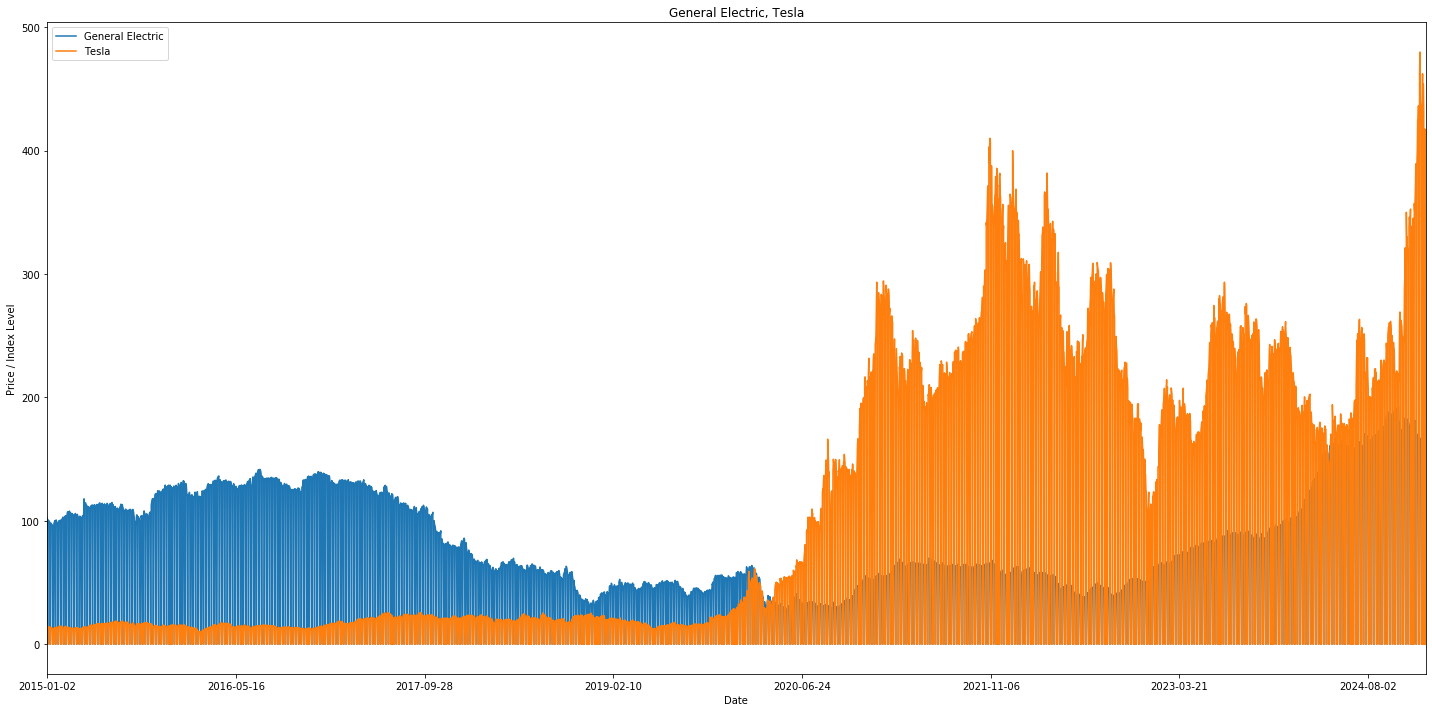

,General Electric,Tesla
Date,,
2015-01-02,102.58,14.62
2015-01-03,0.00,0.00
2015-01-04,0.00,0.00
2015-01-05,100.70,14.01
2015-01-06,98.53,14.09
...,...,...
2024-12-28,0.00,0.00
2024-12-29,0.00,0.00
2024-12-30,167.15,417.41


In [92]:
#vizmany(["Dow Jones", "S&P500", "Nasdaq"], "1995-01-02", "2000-01-01")
#vizmany(["Microsoft", "Apple"], "2015-01-02", "2025-01-01")
#vizone("Apple", "2000-01-02", "2025-01-01")
vizmany(["General Electric", "Tesla"], "2015-01-02", "2025-01-01")

In [195]:
# calculate total return for a given stock over a given period of time
market = market.fillna(0)
def next_nonzero_date(date, stock):
    # snap date to existing index (previous date if not exact)
    ts = str(pd.to_datetime(date))
    pos = market.index.get_loc(ts, method="pad")
    idx = pos

    # walk forward until non-zero or out of data
    while idx < len(market.index) and market.iloc[idx][stock] == 0:
        idx += 1

    if idx >= len(market.index):
        raise ValueError(f"No non-zero value found for {stock} on or after {date}")

    return market.index[idx]
 

def total_return(stock, start=None, end=None):
    start, end = validate_date(start, end)
    if start is None or end is None:
        return None

    print(stock)
    # find first non-zero price at/after start
    sidx = next_nonzero_date(start, stock)
    # find first non-zero price at/after end
    eidx = next_nonzero_date(end, stock)

    if sidx > eidx:
        print("Adjusted start date is after adjusted end date")
        return None

    p_start = market.loc[sidx, stock]
    p_end   = market.loc[eidx, stock]

    total_ret = (p_end - p_start) / p_start
    return total_ret * 100.0
    

In [199]:
#total_return("Dow Jones")                      # full sample
print(total_return("Dow Jones", start="2015-01-01", end="2025-01-01"))  # string; converted to Timestamp
#market.loc["1995-01-03", "Dow Jones"]
print(total_return("Apple", start="2015-01-01", end="2025-01-01"))
print(total_return("Amazon", start="2015-01-01", end="2025-01-01"))

start:  2015-01-01 00:00:00  end:  2025-01-01 00:00:00
Dow Jones
137.7182401829418
start:  2015-01-01 00:00:00  end:  2025-01-01 00:00:00
Apple
901.443894389439
start:  2015-01-01 00:00:00  end:  2025-01-01 00:00:00
Amazon
1327.2197018794554


In [204]:
# event analysis
events.head()

,DATE,FINANCIAL EVENT,CAUSE
0,1997-07,Asian Financial Crisis,"Thailand abandons the baht""s USD peg; Contagio..."
1,1998-08,Russian Financial Crisis,Russia defaults on domestic debt and devalues ...
2,2000-03,Dot Com Bubble Burst,NASDAQ peaks at 5048 and begins its collapse
3,2007-06,Global Financial Crisis,Subprime mortgage market collapses credit mark...
4,2010-05,European Sovereign Debt Crisis,Greece Ireland and Portugal receives EU-IMF ba...


start:  2005-01-01 00:00:00  end:  2015-01-01 00:00:00


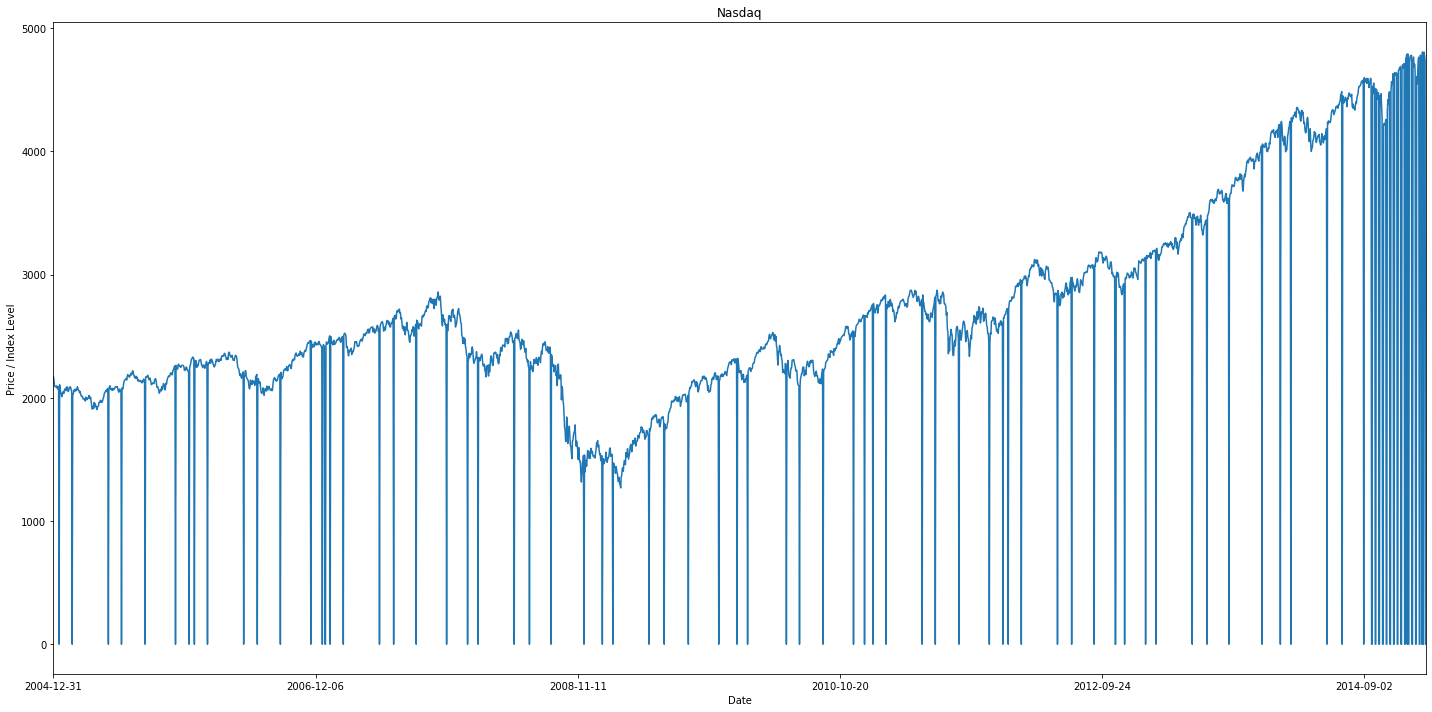

Date
2004-12-31    2175.44
2005-01-03    2152.15
2005-01-04    2107.86
2005-01-05    2091.24
2005-01-06    2090.00
               ...   
2014-12-28       0.00
2014-12-29    4806.91
2014-12-30    4777.44
2014-12-31    4736.05
2015-01-01       0.00
Name: Nasdaq, Length: 2618, dtype: float64

In [206]:
vizone("Nasdaq", start="2005-01-01", end="2015-01-01")

In [210]:
events

,DATE,FINANCIAL EVENT,CAUSE
0,1997-07,Asian Financial Crisis,"Thailand abandons the baht""s USD peg; Contagio..."
1,1998-08,Russian Financial Crisis,Russia defaults on domestic debt and devalues ...
2,2000-03,Dot Com Bubble Burst,NASDAQ peaks at 5048 and begins its collapse
3,2007-06,Global Financial Crisis,Subprime mortgage market collapses credit mark...
4,2010-05,European Sovereign Debt Crisis,Greece Ireland and Portugal receives EU-IMF ba...
5,2015-07,Chinese Stock Market Crash,Chinese market loses ~30% of value in weeks
6,2016-06,Brexit Shock,UK votes to leave the EU
7,2020-03,COVID-19 Pandemic,Global COVID-19/SARS-CoV-2 pandemic
8,2021-01,Meme Stock Mania,GameStop (GME) short squeeze peaks
9,2022-03,Global Inflation & Rate Hikes,Reserve begins fastest rate-hike cycle since t...
